In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Separating Target variable
target = data["label"]

In [5]:
#Dropping label from data set
data.drop("label", axis=1, inplace=True)

In [6]:
data.shape

(42000, 784)

In [7]:
target.shape

(42000,)

In [8]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 100
grid_data = data.iloc[idx, :].to_numpy().reshape(28,28)

<Figure size 504x504 with 0 Axes>

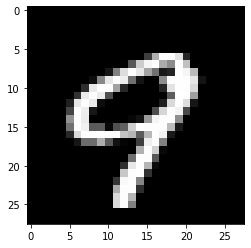

In [9]:
plt.imshow(grid_data, cmap="gray",interpolation = "none")
plt.show()

In [10]:
print(target[100])

9


## 2-D Visualization using PCA - PCA done manually

In [12]:
# 1. Data Preprocessing - Column Standardization
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)

In [13]:
# Finding the co-variance of the matrix (A^T . A)

sample_data = standardized_data

# Matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)

In [14]:
print(f"Dimension of covariance matrix is {covar_matrix.shape}")

Dimension of covariance matrix is (784, 784)


In [15]:
# Finding top 2 eigen values and corresponding eigen vectors for covariance matrix
# for projecting into 2-D

from scipy.linalg import eigh

# Only top 2 eigen values and its corresponding eigen vectors
values, vectors = eigh(covar_matrix, eigvals=(782, 783))

In [17]:
print(f"Shape of eigen vector is {vectors.shape}")

Shape of eigen vector is (784, 2)


In [18]:
# Transposing eigen vector for matrix multiplication with standardized data
vectors = vectors.T

In [19]:
print(f"Updated Shape of eigen vector is {vectors.shape}")

Updated Shape of eigen vector is (2, 784)


In [21]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.
new_cordinates = np.matmul(vectors, sample_data.T)

In [23]:
new_data = np.vstack((new_cordinates,target)).T

In [24]:
dataframe = pd.DataFrame(new_data, columns=("1st_Principle", "2nd_Principal", "Label"))

In [25]:
dataframe.head()

,1st_Principle,2nd_Principal,Label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


In [26]:
import seaborn as sns

C:\Users\prasa\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


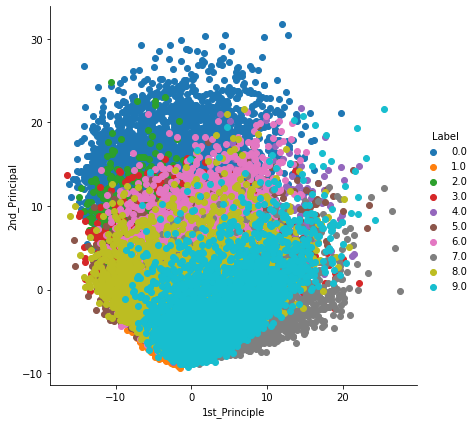

In [27]:
sns.FacetGrid(dataframe, hue="Label", size=6).map(plt.scatter, "1st_Principle", "2nd_Principal").add_legend()
plt.show()

## PCA using Scikit-Learn

In [28]:
from sklearn import decomposition

In [29]:
pca = decomposition.PCA()

In [30]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

In [32]:
pca_data.shape

(42000, 2)

In [33]:
target.shape

(42000,)

In [35]:
pca_vstack = np.vstack((pca_data.T, target)).T

In [36]:
pca_df = pd.DataFrame(pca_vstack, columns=("1st","2nd", "Labels"))

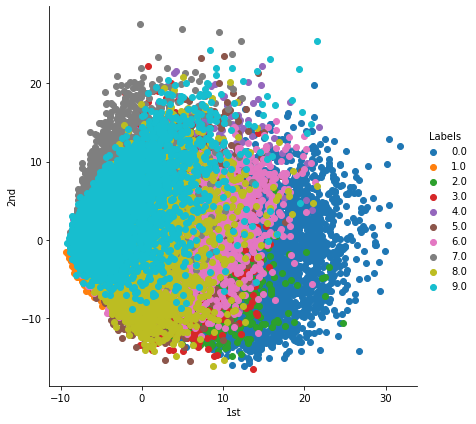

In [38]:
sns.FacetGrid(pca_df, hue="Labels", size=6).map(plt.scatter, "1st", "2nd").add_legend()
plt.show()